In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image

- 해야할 EDA 개괄
    - 전체 데이터 경향성을 파악하고 비즈니스 시나리오 만들기
    - 매출 추이 분석 (일별, 주별, 월별, 연도별)
    - 고객 세그먼테이션 (구매 빈도, 구매 금액, 구매 카데고리 등)
    - 평가 지표 분석 (매출 증가율, 고객 유지율, 재구매율, 평균 주문 금액, CPC 등)
    - 마케팅 효과 분석 (다양한 마케팅 채널 별로 매출 및 고객 획득 데이터를 분석하여 효율적인 마케팅 전략을 수립)
    - 카데고리 분석 (인기 상품, 경쟁력 있는 카데고리, 성장 가능성 있는 카데고리)
    - 다양한 변수들 간의 상관관계 분석
    - 고객 구매 패턴 분석, 추천 시스템, 가격 최적화, 장바구니 분석, 크로스 세일, 재고 관리
    - 고객 이탈 예측

# 테이블 변수 정의

- **Users**
    - **id**: 각 사용자의 고유 식별자
    - **first_name**: 사용자의 이름
    - **last_name**: 사용자의 성
    - **email**: 사용자의 이메일 주소
    - **age**: 사용자의 나이
    - **gender**: 사용자의 성별
    - **state**: 사용자가 위치한 주(도)
    - **street_address**: 사용자의 거리 주소
    - **postal_code**: 사용자의 우편번호
    - **city**: 사용자가 위치한 도시
    - **country**: 사용자가 위치한 국가
    - **latitude**: 사용자의 위도 좌표
    - **longitude**: 사용자의 경도 좌표
    - **traffic_source**: 사용자로 이어진 트래픽의 출처
    - **created_at**: 사용자 계정이 생성된 타임스탬프

- **Product**
    - **id**: 각 제품의 고유 식별자
    - **cost**: 제품의 비용
    - **category**: 제품이 속한 카테고리
    - **name**: 제품의 이름
    - **brand**: 제품의 브랜드
    - **retail_price**: 제품의 소매 가격
    - **department**: 제품이 속한 부서 또는 부문
    - **sku**: 제품의 재고 유지 단위(Unit), (SKU)
    - **distribution_center_id**: 제품과 관련된 물류 센터 식별자

 - **Order_items**
    - **id**: 각 주문 항목의 고유 식별자
    - **order_id**: 관련 주문에 대한 식별자
    - **user_id**: 주문한 유저의 식별자
    - **product_id**: 관련 제품의 식별자
    - **inventory_item_id**: 관련 인벤토리 항목에 대한 식별자
    - **status**: 주문상품 상태
    - **created_at**: 주문 항목이 생성된 시간을 나타내는 타임스탬프
    - **shipped_at**: 주문 상품이 배송된 시간을 나타내는 타임스탬프
    - **delivered_at**: 주문 상품이 배송된 시간을 나타내는 타임스탬프
    - **returned_at**: 주문 상품이 반품된 시간을 나타내는 타임스탬프

- **Orders**
    - **order_id**: 각 주문의 고유 식별자
    - **user_id**: 주문을 한 사용자의 식별자
    - **status**: 주문의 상태
    - **gender**: 사용자의 성별 정보
    - **created_at**: 주문이 생성된 타임스탬프
    - **returned_at**: 주문이 반환된 타임스탬프
    - **shipped_at**: 주문이 발송된 타임스탬프
    - **delivered_at**: 주문이 배달된 타임스탬프
    - **num_of_item**: 주문에 포함된 상품 수

- **Events**
    - **id**: 각 이벤트의 고유 식별자
    - **user_id**: 이벤트와 관련된 유저 식별자
    - **sequence_number**: 이벤트의 시퀀스 번호
    - **session_id**: 이벤트가 발생한 세션의 식별자
    - **created_at**: 이벤트가 발생한 시간을 나타내는 타임스탬프
    - **ip_address**: 이벤트가 시작된 IP 주소
    - **city**: 이벤트 발생 도시.
    - **state**: 이벤트가 발생한 상태
    - **postal_code**: 이벤트 장소의 우편번호
    - **browser**: 이벤트 중 사용된 웹 브라우저
    - **traffic_source**: 이벤트로 이어지는 트래픽의 소스
    - **uri**: 이벤트와 관련된 URI(Uniform Resource Identifier)입니다. / URI= 식별자, URL=식별자+위치
    - **event_type**: 기록된 이벤트 유형

- **Inventory_items**
    - **id**: 각 재고 아이템의 고유 식별자
    - **product_id**: 연관된 제품의 식별자
    - **created_at**: 재고 아이템이 생성된 타임스탬프
    - **sold_at**: 상품이 판매된 타임스탬프
    - **cost**: 재고 제품의 비용
    - **product_category**: 연관된 제품의 카테고리
    - **product_name**: 연관된 제품의 이름
    - **product_brand**: 연관된 제품의 브랜드
    - **product_retail_price**: 연관된 제품의 소매 가격
    - **product_department**: 제품이 속한 부서?
    - **product_sku**: 제품의 재고 유지 단위(Unit), (SKU)
    - **product_distribution_center_id**: 제품과 관련된 물류 센터의 식별자

- **Distribution_centers**
    - **id**: 각 물류 센터의 고유 식별자
    - **name**: 물류 센터의 이름
    - **latitude**: 물류 센터의 위도 좌표
    - **longitude**: 물류 센터의 경도 좌표

In [2]:
# 기존 프로젝트에서 얻었던 인사이트

# 30분을 넘어가는 세션이 존재함(하루 뒤에 구매 데이터가 붙는 경우)
# 주문에는 User_ID가 없는 세션은 물건을 구매하지 않은 세션임

In [3]:
users = pd.read_csv('./data/users.csv')
users = users.assign(created_at = pd.to_datetime(users.created_at)).sort_values('created_at').reset_index(drop=True)

products = pd.read_csv('./data/products.csv')

inventory_items = pd.read_csv('./data/inventory_items.csv')
inventory_items = inventory_items.assign(created_at = pd.to_datetime(inventory_items.created_at)).sort_values('created_at').reset_index(drop=True)
inventory_items = inventory_items.assign(sold_at = pd.to_datetime(inventory_items.sold_at))

orders = pd.read_csv('./data/orders.csv')
orders = orders.assign(created_at = pd.to_datetime(orders.created_at)).sort_values('created_at').reset_index(drop=True)

order_items = pd.read_csv('./data/order_items.csv')
order_items = order_items.assign(created_at = pd.to_datetime(order_items.created_at)).sort_values('created_at').reset_index(drop=True)
order_items = order_items.assign(shipped_at = pd.to_datetime(order_items.shipped_at))
order_items = order_items.assign(delivered_at = pd.to_datetime(order_items.delivered_at))
order_items = order_items.assign(returned_at = pd.to_datetime(order_items.returned_at))

events = pd.read_csv('./data/events.csv')
events = events.assign(created_at = pd.to_datetime(events.created_at)).sort_values('created_at').reset_index(drop=True)

In [4]:
events = events.assign(created_year = events.created_at.dt.year)
events = events.assign(created_month = events.created_at.dt.month)
events = events.assign(created_day = events.created_at.dt.day)
events = events.assign(created_day_of_week = events.created_at.dt.day_of_week)
events = events.assign(created_hour = events.created_at.dt.hour)

events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_year,created_month,created_day,created_day_of_week,created_hour
0,1438360,NaN,1,d63f8621-f5e9-4d9a-b6a7-5b48adc3b05c,2019-01-02 00:05:00+00:00,165.197.36.113,Zhengzhou,Shanxi,41000,Safari,Adwords,/product/19555,product,2019,1,2,2,0
1,1770247,NaN,1,6c229e08-3d5d-4323-9707-4588bef033c8,2019-01-02 00:24:00+00:00,145.154.167.33,Taizhou,Hebei,57350,Chrome,Facebook,/department/men/category/active/brand/columbia,department,2019,1,2,2,0
2,1770248,NaN,2,6c229e08-3d5d-4323-9707-4588bef033c8,2019-01-02 00:25:00+00:00,145.154.167.33,Taizhou,Hebei,57350,Chrome,Facebook,/product/18789,product,2019,1,2,2,0
3,2380982,NaN,1,01ac765d-2bb6-4e2e-8502-b9a36fdcffcf,2019-01-02 00:26:00+00:00,167.160.250.220,New York,New York,11234,Firefox,Email,/product/24584,product,2019,1,2,2,0
4,2128542,NaN,1,463fbb4c-6ccd-4c2a-a1c0-340920e2b402,2019-01-02 00:27:00+00:00,82.81.55.110,Bellingham,Washington,98226,Chrome,YouTube,/department/women/category/leggings/brand/queen,department,2019,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,678500,51815.0,13,8ce4a147-082b-4b09-94e0-343049a12c44,2024-01-21 17:10:33.200976+00:00,184.71.171.78,Arlington,Texas,76010,Firefox,Adwords,/purchase,purchase,2024,1,21,6,17
2431959,852132,65146.0,13,86f029a6-30a7-413a-ba0b-2698d2e80907,2024-01-21 17:28:11.434458+00:00,207.7.64.158,Zhangjiakou,Anhui,232007,Firefox,Email,/purchase,purchase,2024,1,21,6,17
2431960,1024111,78257.0,7,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-21 17:46:48.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,YouTube,/purchase,purchase,2024,1,21,6,17
2431961,852145,65146.0,13,e5b9d6ee-f0d6-4ae0-8639-9e54a32eadfd,2024-01-21 17:57:14.434458+00:00,81.193.18.239,Zhangjiakou,Anhui,232007,Safari,Facebook,/purchase,purchase,2024,1,21,6,17


In [5]:
events_uri = events[['session_id', 'uri']].loc[events['event_type']=='product']
events_uri

,session_id,uri
0,d63f8621-f5e9-4d9a-b6a7-5b48adc3b05c,/product/19555
2,6c229e08-3d5d-4323-9707-4588bef033c8,/product/18789
3,01ac765d-2bb6-4e2e-8502-b9a36fdcffcf,/product/24584
6,7b509d42-3794-471d-a665-5e500c564cb5,/product/5572
7,e864fb28-6e30-4167-b105-182b2edbce0b,/product/15839
...,...,...
2430716,c1f42c9e-606c-4792-a473-09d732529a26,/product/22623
2430723,8377589f-bf41-4da7-a788-535f8d82d100,/product/20314
2430730,43ceafe4-265c-434a-8933-0eaf6d0538b2,/product/22132
2430734,2971b264-7f39-4a6d-bae7-f73d2989afef,/product/7559


In [6]:
events_uri = events_uri.assign(product_id=events_uri['uri'].str.split('/').str.get(2).astype(int))
session_product = events_uri.drop('uri', axis=1).drop_duplicates()
session_product

,session_id,product_id
0,d63f8621-f5e9-4d9a-b6a7-5b48adc3b05c,19555
2,6c229e08-3d5d-4323-9707-4588bef033c8,18789
3,01ac765d-2bb6-4e2e-8502-b9a36fdcffcf,24584
6,7b509d42-3794-471d-a665-5e500c564cb5,5572
7,e864fb28-6e30-4167-b105-182b2edbce0b,15839
...,...,...
2430710,c1f42c9e-606c-4792-a473-09d732529a26,22623
2430711,61644edd-215b-4d6b-8d18-82ee03d81bdd,28523
2430723,8377589f-bf41-4da7-a788-535f8d82d100,20314
2430730,43ceafe4-265c-434a-8933-0eaf6d0538b2,22132


In [7]:
# 세션 아이디 당 1개의 product만 주문되는 것을 확인할 수 있음 -> 장바구니 분석 어려울지도?
session_product[session_product.duplicated('session_id')]

,session_id,product_id


In [8]:
events = pd.merge(events, session_product, how='left', on='session_id')
events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_year,created_month,created_day,created_day_of_week,created_hour,product_id
0,1438360,NaN,1,d63f8621-f5e9-4d9a-b6a7-5b48adc3b05c,2019-01-02 00:05:00+00:00,165.197.36.113,Zhengzhou,Shanxi,41000,Safari,Adwords,/product/19555,product,2019,1,2,2,0,19555
1,1770247,NaN,1,6c229e08-3d5d-4323-9707-4588bef033c8,2019-01-02 00:24:00+00:00,145.154.167.33,Taizhou,Hebei,57350,Chrome,Facebook,/department/men/category/active/brand/columbia,department,2019,1,2,2,0,18789
2,1770248,NaN,2,6c229e08-3d5d-4323-9707-4588bef033c8,2019-01-02 00:25:00+00:00,145.154.167.33,Taizhou,Hebei,57350,Chrome,Facebook,/product/18789,product,2019,1,2,2,0,18789
3,2380982,NaN,1,01ac765d-2bb6-4e2e-8502-b9a36fdcffcf,2019-01-02 00:26:00+00:00,167.160.250.220,New York,New York,11234,Firefox,Email,/product/24584,product,2019,1,2,2,0,24584
4,2128542,NaN,1,463fbb4c-6ccd-4c2a-a1c0-340920e2b402,2019-01-02 00:27:00+00:00,82.81.55.110,Bellingham,Washington,98226,Chrome,YouTube,/department/women/category/leggings/brand/queen,department,2019,1,2,2,0,6060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,678500,51815.0,13,8ce4a147-082b-4b09-94e0-343049a12c44,2024-01-21 17:10:33.200976+00:00,184.71.171.78,Arlington,Texas,76010,Firefox,Adwords,/purchase,purchase,2024,1,21,6,17,27423
2431959,852132,65146.0,13,86f029a6-30a7-413a-ba0b-2698d2e80907,2024-01-21 17:28:11.434458+00:00,207.7.64.158,Zhangjiakou,Anhui,232007,Firefox,Email,/purchase,purchase,2024,1,21,6,17,28536
2431960,1024111,78257.0,7,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-21 17:46:48.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,YouTube,/purchase,purchase,2024,1,21,6,17,16771
2431961,852145,65146.0,13,e5b9d6ee-f0d6-4ae0-8639-9e54a32eadfd,2024-01-21 17:57:14.434458+00:00,81.193.18.239,Zhangjiakou,Anhui,232007,Safari,Facebook,/purchase,purchase,2024,1,21,6,17,16987


In [9]:
events.value_counts('created_year').sort_index() # 이벤트가 폭증한 시점은 2023년

created_year
2019    247846
2020    316033
2021    399188
2022    526737
2023    837211
2024    104948
dtype: int64

In [10]:
events_2019 = events[events.created_year==2019]
events_2020 = events[events.created_year==2020]
events_2021 = events[events.created_year==2021]
events_2022 = events[events.created_year==2022]
events_2023 = events[events.created_year==2023]
events_2024 = events[events.created_year==2024]

In [11]:
events_created_month = (events.value_counts('created_month', normalize=True).sort_index()*100).round(2)
events_2019_created_month = (events_2019.value_counts('created_month', normalize=True).sort_index()*100).round(2)
events_2020_created_month = (events_2020.value_counts('created_month', normalize=True).sort_index()*100).round(2)
events_2021_created_month = (events_2021.value_counts('created_month', normalize=True).sort_index()*100).round(2)
events_2022_created_month = (events_2022.value_counts('created_month', normalize=True).sort_index()*100).round(2)
events_2023_created_month = (events_2023.value_counts('created_month', normalize=True).sort_index()*100).round(2)
events_2024_created_month = (events_2024.value_counts('created_month', normalize=True).sort_index()*100).round(2)

yealy_created_month = pd.concat([events_created_month, events_2019_created_month, events_2020_created_month, 
                                 events_2021_created_month, events_2022_created_month, events_2023_created_month, events_2024_created_month], axis=1)
yealy_created_month.columns = ['entire_year', '2019', '2020', '2021', '2022', '2023', '2024']
yealy_created_month

# 전체 기간으로 봤을 땐 1월에 이벤트가 많은 것처럼 보이지만 이는 2024년이 1월 데이터만 집계됐기 때문임
# J커브로 인한것인지 월별로 서서히 이벤트 비중이 늘어나는 것을 확인할 수 있음

,entire_year,2019,2020,2021,2022,2023,2024
created_month,,,,,,,
1,11.14,7.29,7.71,8.04,7.43,6.26,100.0
2,6.28,7.10,7.26,6.85,6.68,5.92,NaN
3,7.15,7.99,7.93,7.92,7.44,6.95,NaN
4,7.06,8.01,7.68,7.69,7.54,6.84,NaN
5,7.63,8.34,8.32,8.21,8.34,7.40,NaN
6,7.51,8.21,8.18,8.10,7.92,7.46,NaN
7,8.09,8.64,8.45,8.38,8.63,8.31,NaN
8,8.27,8.58,8.34,8.70,8.90,8.60,NaN
9,8.34,8.71,8.49,8.58,8.57,8.97,NaN


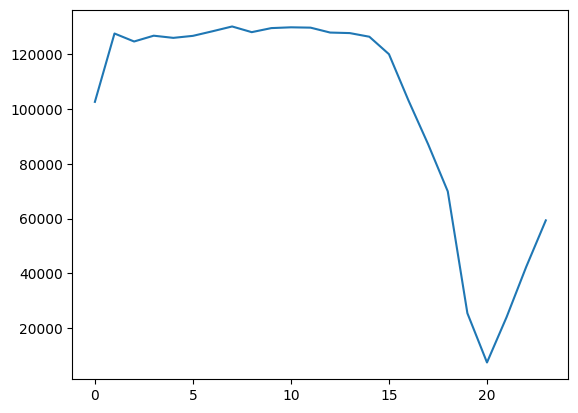

In [12]:
# 뭔가 이벤트 발생 시간이 이상함
# 0시에서 19시까지가 제일 많고 20시에 뚝 떨어진다? -> 아마 Timezone 때문이 아닐까
# 근데 생각해보니 전 세계 서비스지 않았나? 아무튼 알 수 없음

event_created_hour = events.value_counts('created_hour').sort_index()
plt.plot(event_created_hour)
plt.show()

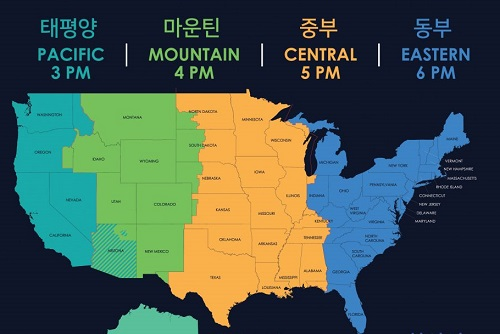

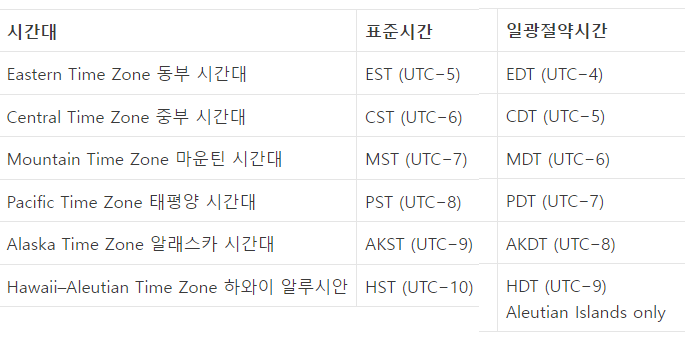

In [13]:
# 우선 미국 Timezone 관련 정보 첨부함

display(Image('./data/image/shutterstock_1589833123-2-1-1024x893.jpg'))
display(Image('./data/image/캡처.PNG'))

In [14]:
events_user = events[events.user_id.notna()]
events_no_user = events[events.user_id.isna()]

print(events_user.shape[0])
print(events_no_user.shape[0])

1306292
1125671


In [15]:
events_user = pd.merge(events_user, products[['id', 'cost', 'category', 'brand', 'retail_price', 'department']], left_on='product_id', right_on='id', how='left')
events_user

,id_x,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,...,created_day,created_day_of_week,created_hour,product_id,id_y,cost,category,brand,retail_price,department
0,312048,23839.0,1,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:16:07+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,6,6,2,12305,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
1,312049,23839.0,2,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:16:53+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,6,6,2,12305,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
2,312050,23839.0,3,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:17:03+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,6,6,2,12305,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
3,312051,23839.0,4,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:19:12+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,6,6,2,12305,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
4,312052,23839.0,5,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:19:50+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,6,6,2,12305,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306287,678500,51815.0,13,8ce4a147-082b-4b09-94e0-343049a12c44,2024-01-21 17:10:33.200976+00:00,184.71.171.78,Arlington,Texas,76010,Firefox,...,21,6,17,27423,27423,27.225000,Swim,Volcom,45.000000,Men
1306288,852132,65146.0,13,86f029a6-30a7-413a-ba0b-2698d2e80907,2024-01-21 17:28:11.434458+00:00,207.7.64.158,Zhangjiakou,Anhui,232007,Firefox,...,21,6,17,28536,28536,3.542060,Accessories,Gem Avenue,8.990000,Men
1306289,1024111,78257.0,7,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-21 17:46:48.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,...,21,6,17,16771,16771,18.194801,Tops & Tees,Pacific Legend,34.990002,Men
1306290,852145,65146.0,13,e5b9d6ee-f0d6-4ae0-8639-9e54a32eadfd,2024-01-21 17:57:14.434458+00:00,81.193.18.239,Zhangjiakou,Anhui,232007,Safari,...,21,6,17,16987,16987,4.570280,Tops & Tees,Gildan,7.990000,Men


# 나무늘보

In [20]:
# Product_id와 id_y가 중복 -> 삭제
events_user = events_user.drop('id_y',axis=1)
events_user = events_user.rename(columns ={'id_x' : 'event_id'})
events_user

,event_id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,...,created_month,created_day,created_day_of_week,created_hour,product_id,cost,category,brand,retail_price,department
0,312048,23839.0,1,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:16:07+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,1,6,6,2,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
1,312049,23839.0,2,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:16:53+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,1,6,6,2,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
2,312050,23839.0,3,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:17:03+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,1,6,6,2,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
3,312051,23839.0,4,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:19:12+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,1,6,6,2,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
4,312052,23839.0,5,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:19:50+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,1,6,6,2,12305,8.190000,Intimates,Donna Di Capri,15.000000,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306287,678500,51815.0,13,8ce4a147-082b-4b09-94e0-343049a12c44,2024-01-21 17:10:33.200976+00:00,184.71.171.78,Arlington,Texas,76010,Firefox,...,1,21,6,17,27423,27.225000,Swim,Volcom,45.000000,Men
1306288,852132,65146.0,13,86f029a6-30a7-413a-ba0b-2698d2e80907,2024-01-21 17:28:11.434458+00:00,207.7.64.158,Zhangjiakou,Anhui,232007,Firefox,...,1,21,6,17,28536,3.542060,Accessories,Gem Avenue,8.990000,Men
1306289,1024111,78257.0,7,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-21 17:46:48.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,...,1,21,6,17,16771,18.194801,Tops & Tees,Pacific Legend,34.990002,Men
1306290,852145,65146.0,13,e5b9d6ee-f0d6-4ae0-8639-9e54a32eadfd,2024-01-21 17:57:14.434458+00:00,81.193.18.239,Zhangjiakou,Anhui,232007,Safari,...,1,21,6,17,16987,4.570280,Tops & Tees,Gildan,7.990000,Men


In [21]:
# events_user와 merge하기 위해서 형변환
order_items['user_id'] = order_items['user_id'].astype(float)
order_items = order_items.rename(columns ={'id' : 'order_item_id'})
order_items

,order_item_id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,43361,29835,23839.0,12305,116952,Shipped,2019-01-06 02:25:41+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,15.000000
1,43359,29835,23839.0,1986,116945,Shipped,2019-01-06 02:44:54+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,32.000000
2,167395,115297,92102.0,4865,451930,Cancelled,2019-01-07 01:23:18+00:00,NaT,NaT,NaT,44.500000
3,43360,29835,23839.0,1887,116949,Shipped,2019-01-07 03:08:03+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,80.000000
4,123449,85009,67807.0,20973,333223,Processing,2019-01-11 16:29:00+00:00,NaT,NaT,NaT,319.000000
...,...,...,...,...,...,...,...,...,...,...,...
181754,94272,64843,51815.0,27423,254456,Complete,2024-01-21 17:10:33.200976+00:00,2024-01-18 22:44:58.200976+00:00,2024-01-20 02:15:58.200976+00:00,NaT,45.000000
181755,118584,81679,65146.0,28536,320024,Processing,2024-01-21 17:28:11.434458+00:00,NaT,NaT,NaT,8.990000
181756,142442,98067,78257.0,16771,384535,Complete,2024-01-21 17:46:48.782754+00:00,2024-01-20 08:40:18.782754+00:00,2024-01-21 09:40:18.782754+00:00,NaT,34.990002
181757,118585,81679,65146.0,16987,320026,Processing,2024-01-21 17:57:14.434458+00:00,NaT,NaT,NaT,7.990000


In [24]:
events_user_order_item = pd.merge(events_user, order_items, on=['user_id', 'product_id'], how='right',suffixes=('_events','_order_item'))
events_user_order_item

,event_id,user_id,sequence_number,session_id,created_at_events,ip_address,city,state,postal_code,browser,...,department,order_item_id,order_id,inventory_item_id,status,created_at_order_item,shipped_at,delivered_at,returned_at,sale_price
0,312048,23839.0,1,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:16:07+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,Women,43361,29835,116952,Shipped,2019-01-06 02:25:41+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,15.000000
1,312049,23839.0,2,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:16:53+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,Women,43361,29835,116952,Shipped,2019-01-06 02:25:41+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,15.000000
2,312050,23839.0,3,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:17:03+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,Women,43361,29835,116952,Shipped,2019-01-06 02:25:41+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,15.000000
3,312051,23839.0,4,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:19:12+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,Women,43361,29835,116952,Shipped,2019-01-06 02:25:41+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,15.000000
4,312052,23839.0,5,a88ed212-68c7-4732-b4fc-5e1311d2b945,2019-01-06 02:19:50+00:00,136.198.160.147,São Luís,Maranhão,65052-050,Firefox,...,Women,43361,29835,116952,Shipped,2019-01-06 02:25:41+00:00,2019-01-09 04:36:00+00:00,NaT,NaT,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306510,612240,46786.0,6,f4e28fbf-4d45-4801-a0c1-cede8e23cc9b,2024-01-17 17:53:45.533893+00:00,28.254.167.8,Jundiaí,São Paulo,13213,Safari,...,Women,85076,58534,229601,Shipped,2024-01-21 18:02:23.533893+00:00,2024-01-20 01:33:15.533893+00:00,NaT,NaT,43.200001
1306511,612241,46786.0,7,f4e28fbf-4d45-4801-a0c1-cede8e23cc9b,2024-01-17 17:56:44.533893+00:00,28.254.167.8,Jundiaí,São Paulo,13213,Safari,...,Women,85076,58534,229601,Shipped,2024-01-21 18:02:23.533893+00:00,2024-01-20 01:33:15.533893+00:00,NaT,NaT,43.200001
1306512,612242,46786.0,8,f4e28fbf-4d45-4801-a0c1-cede8e23cc9b,2024-01-17 17:58:16.533893+00:00,28.254.167.8,Jundiaí,São Paulo,13213,Safari,...,Women,85076,58534,229601,Shipped,2024-01-21 18:02:23.533893+00:00,2024-01-20 01:33:15.533893+00:00,NaT,NaT,43.200001
1306513,612243,46786.0,9,f4e28fbf-4d45-4801-a0c1-cede8e23cc9b,2024-01-17 17:59:35.533893+00:00,28.254.167.8,Jundiaí,São Paulo,13213,Safari,...,Women,85076,58534,229601,Shipped,2024-01-21 18:02:23.533893+00:00,2024-01-20 01:33:15.533893+00:00,NaT,NaT,43.200001


In [26]:
# 칼럼들 한 번에 보기 위함.
pd.set_option('display.max_columns', None)

## status = Complete

In [31]:
# 성공적으로 주문이 된 것들만 보기 위해서 제작
Complete_event_user_orderItem = events_user_order_item[events_user_order_item['status'] == 'Complete']
Complete_event_user_orderItem

,event_id,user_id,sequence_number,session_id,created_at_events,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_year,created_month,created_day,created_day_of_week,created_hour,product_id,cost,category,brand,retail_price,department,order_item_id,order_id,inventory_item_id,status,created_at_order_item,shipped_at,delivered_at,returned_at,sale_price
70,637802,48766.0,1,c2a78899-9c46-442c-91d0-c9e683af672c,2019-01-14 14:41:27+00:00,111.147.175.5,Manchester,England,M19,Chrome,Adwords,/home,home,2019,1,14,0,14,965,13.083910,Sweaters,Alki'i,31.990000,Women,88642,60988,239252,Complete,2019-01-14 14:50:06+00:00,2019-01-15 17:11:00+00:00,2019-01-18 04:47:00+00:00,NaT,31.990000
71,637803,48766.0,2,c2a78899-9c46-442c-91d0-c9e683af672c,2019-01-14 14:43:59+00:00,111.147.175.5,Manchester,England,M19,Chrome,Adwords,/department/women/category/sweaters/brand/alki'i,department,2019,1,14,0,14,965,13.083910,Sweaters,Alki'i,31.990000,Women,88642,60988,239252,Complete,2019-01-14 14:50:06+00:00,2019-01-15 17:11:00+00:00,2019-01-18 04:47:00+00:00,NaT,31.990000
72,637804,48766.0,3,c2a78899-9c46-442c-91d0-c9e683af672c,2019-01-14 14:45:05+00:00,111.147.175.5,Manchester,England,M19,Chrome,Adwords,/product/965,product,2019,1,14,0,14,965,13.083910,Sweaters,Alki'i,31.990000,Women,88642,60988,239252,Complete,2019-01-14 14:50:06+00:00,2019-01-15 17:11:00+00:00,2019-01-18 04:47:00+00:00,NaT,31.990000
73,637805,48766.0,4,c2a78899-9c46-442c-91d0-c9e683af672c,2019-01-14 14:46:51+00:00,111.147.175.5,Manchester,England,M19,Chrome,Adwords,/cart,cart,2019,1,14,0,14,965,13.083910,Sweaters,Alki'i,31.990000,Women,88642,60988,239252,Complete,2019-01-14 14:50:06+00:00,2019-01-15 17:11:00+00:00,2019-01-18 04:47:00+00:00,NaT,31.990000
74,637806,48766.0,5,c2a78899-9c46-442c-91d0-c9e683af672c,2019-01-14 14:49:29+00:00,111.147.175.5,Manchester,England,M19,Chrome,Adwords,/purchase,purchase,2019,1,14,0,14,965,13.083910,Sweaters,Alki'i,31.990000,Women,88642,60988,239252,Complete,2019-01-14 14:50:06+00:00,2019-01-15 17:11:00+00:00,2019-01-18 04:47:00+00:00,NaT,31.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306487,1024107,78257.0,3,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-17 17:36:42.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,YouTube,/cart,cart,2024,1,17,2,17,16771,18.194801,Tops & Tees,Pacific Legend,34.990002,Men,142442,98067,384535,Complete,2024-01-21 17:46:48.782754+00:00,2024-01-20 08:40:18.782754+00:00,2024-01-21 09:40:18.782754+00:00,NaT,34.990002
1306488,1024108,78257.0,4,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-17 17:38:56.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,YouTube,/department/men/category/tops&tees/brand/pacif...,department,2024,1,17,2,17,16771,18.194801,Tops & Tees,Pacific Legend,34.990002,Men,142442,98067,384535,Complete,2024-01-21 17:46:48.782754+00:00,2024-01-20 08:40:18.782754+00:00,2024-01-21 09:40:18.782754+00:00,NaT,34.990002
1306489,1024109,78257.0,5,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-17 17:41:45.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,YouTube,/product/16771,product,2024,1,17,2,17,16771,18.194801,Tops & Tees,Pacific Legend,34.990002,Men,142442,98067,384535,Complete,2024-01-21 17:46:48.782754+00:00,2024-01-20 08:40:18.782754+00:00,2024-01-21 09:40:18.782754+00:00,NaT,34.990002
1306490,1024110,78257.0,6,57165f84-53af-456f-af61-a1437cee1ffe,2024-01-17 17:44:26.782754+00:00,192.22.163.133,Incheon Metropolitan City,Incheon Metropolitan City,403-100,Chrome,YouTube,/cart,cart,2024,1,17,2,17,16771,18.194801,Tops & Tees,Pacific Legend,34.990002,Men,142442,98067,384535,Complete,2024-01-21 17:46:48.782754+00:00,2024-01-20 08:40:18.782754+00:00,2024-01-21 09:40:18.782754+00:00,NaT,34.990002


In [38]:
Complete_event_user_orderItem = Complete_event_user_orderItem.assign(created_year_complete = Complete_event_user_orderItem.created_at_order_item.dt.year)
Complete_event_user_orderItem = Complete_event_user_orderItem.assign(created_month_complete = Complete_event_user_orderItem.created_at_order_item.dt.month)
Complete_event_user_orderItem = Complete_event_user_orderItem.assign(created_day_complete = Complete_event_user_orderItem.created_at_order_item.dt.day)
Complete_event_user_orderItem = Complete_event_user_orderItem.assign(created_day_of_week_complete = Complete_event_user_orderItem.created_at_order_item.dt.day_of_week)
Complete_event_user_orderItem = Complete_event_user_orderItem.assign(created_hour_complete = Complete_event_user_orderItem.created_at_order_item.dt.hour)


##  매출에 관한 분석 시작

In [65]:
# 성별에 따라서는 남자의 제품이 평균 매출을, 총 매출을 봐도 높다.
print(Complete_event_user_orderItem.groupby('department')['sale_price'].sum())
print('------')
print(Complete_event_user_orderItem.groupby('department')['sale_price'].mean())

department
Men      1.046139e+07
Women    9.090021e+06
Name: sale_price, dtype: float64
------
department
Men      63.716305
Women    55.350684
Name: sale_price, dtype: float64


In [70]:
# 성별, 카테고리에 따른 판매액 비교
# Category는 Outerwear & Coats가 가장 높은 매출을 보임. 
Complete_event_user_orderItem.groupby(['department','category'])['sale_price'].sum().nlargest(10)

department  category                     
Men         Outerwear & Coats                1.555151e+06
            Jeans                            1.430282e+06
            Suits & Sport Coats              1.192912e+06
            Sweaters                         9.549673e+05
Women       Outerwear & Coats                8.544028e+05
            Intimates                        8.377787e+05
            Jeans                            8.248066e+05
            Dresses                          7.993691e+05
Men         Pants                            7.979025e+05
            Fashion Hoodies & Sweatshirts    7.010951e+05
Name: sale_price, dtype: float64

In [109]:
# 월별로 카테고리에 따른 매출을 비교
# 특정 월(시즌)에 특정 카테고리가 잘 팔리는 일은 없음.  상위 5개의 카테고리 변환이 없다. 
monthly_sales= Complete_event_user_orderItem.groupby(['created_month','category'])['sale_price'].sum()
monthly_sales.groupby('created_month').nlargest(5)

created_month  created_month  category                     
1              1              Outerwear & Coats                341574.979280
                              Jeans                            267911.160425
                              Sweaters                         211628.630228
                              Suits & Sport Coats              196505.099898
                              Swim                             144927.280165
2              2              Jeans                            117948.210197
                              Outerwear & Coats                108866.969858
                              Sweaters                          85381.459963
                              Fashion Hoodies & Sweatshirts     70394.949958
                              Swim                              61967.739859
3              3              Outerwear & Coats                138398.479702
                              Jeans                            132230.810251
                

## 남성복만 보기

In [207]:
Product_Men_df= Complete_event_user_orderItem[Complete_event_user_orderItem.department =='Men']
Product_Men_df['profit'] = Product_Men_df['sale_price'] - Product_Men_df['cost']

C:\Users\kwon8\AppData\Local\Temp\ipykernel_2540\786322147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_Men_df['profit'] = Product_Men_df['sale_price'] - Product_Men_df['cost']


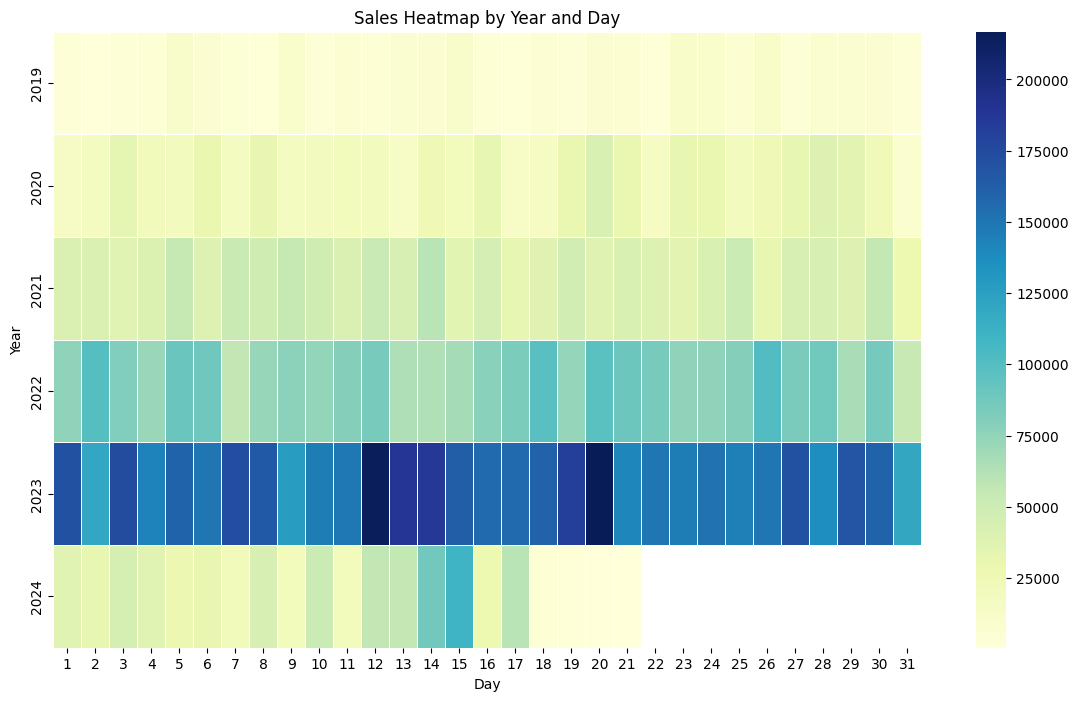

In [206]:
# 년도,일자별 -> profit으로 봐도 의미 없음.
pivot_table  = Product_Men_df.groupby(['created_year', 'created_day'])['sale_price'].sum().reset_index().pivot(index='created_year', columns='created_day', values='sale_price')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Year and Day')
plt.xlabel('Day')
plt.ylabel('Year')
plt.show()

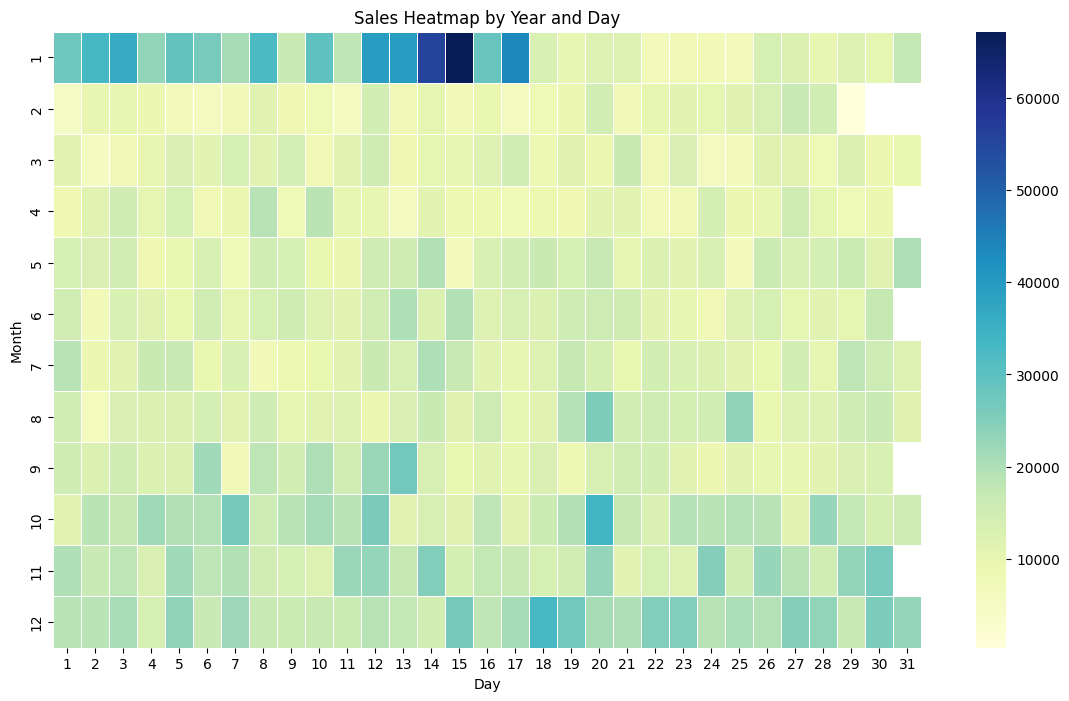

In [204]:
# 월,일자별 판매액 -> profit으로 봐도 변화 없음
pivot_table  = Product_Men_df.groupby(['created_month', 'created_day'])['sale_price'].sum().reset_index().pivot(index='created_month', columns='created_day', values='sale_price')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Year and Day')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()

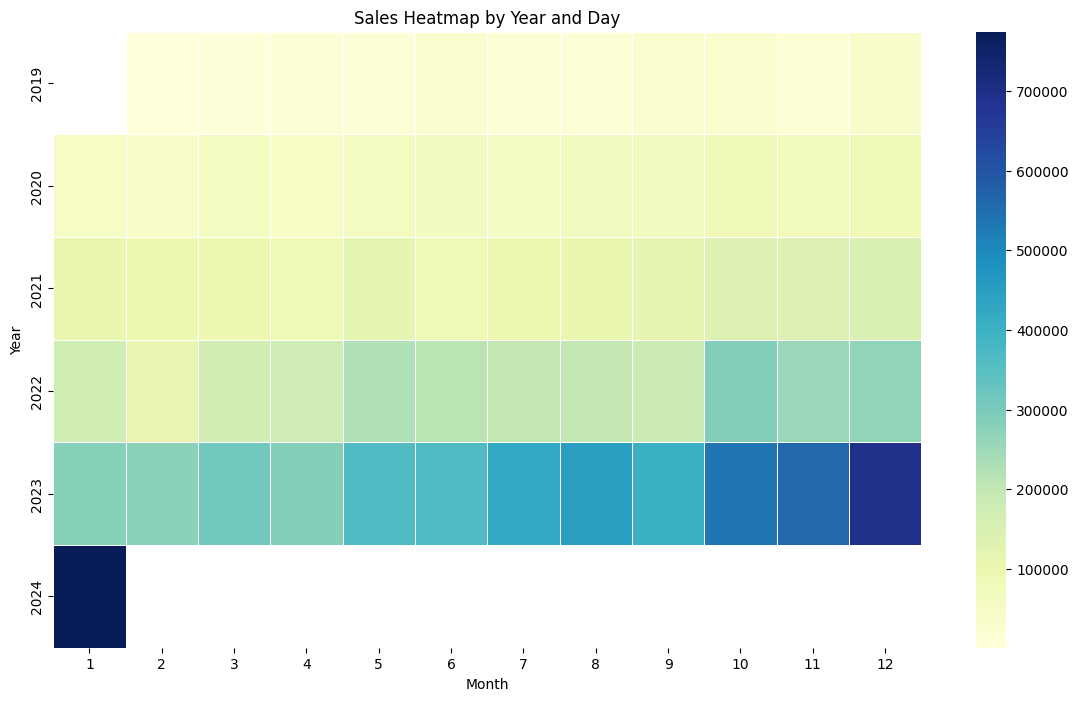

In [202]:
# 년도,월 별 판매액 
pivot_table  = Product_Men_df.groupby(['created_year', 'created_month'])['sale_price'].sum().reset_index().pivot(index='created_year', columns='created_month', values='sale_price')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Year and Day')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

##  여성복만 보기

In [211]:
Product_Women_df= Complete_event_user_orderItem[Complete_event_user_orderItem.department =='Women']

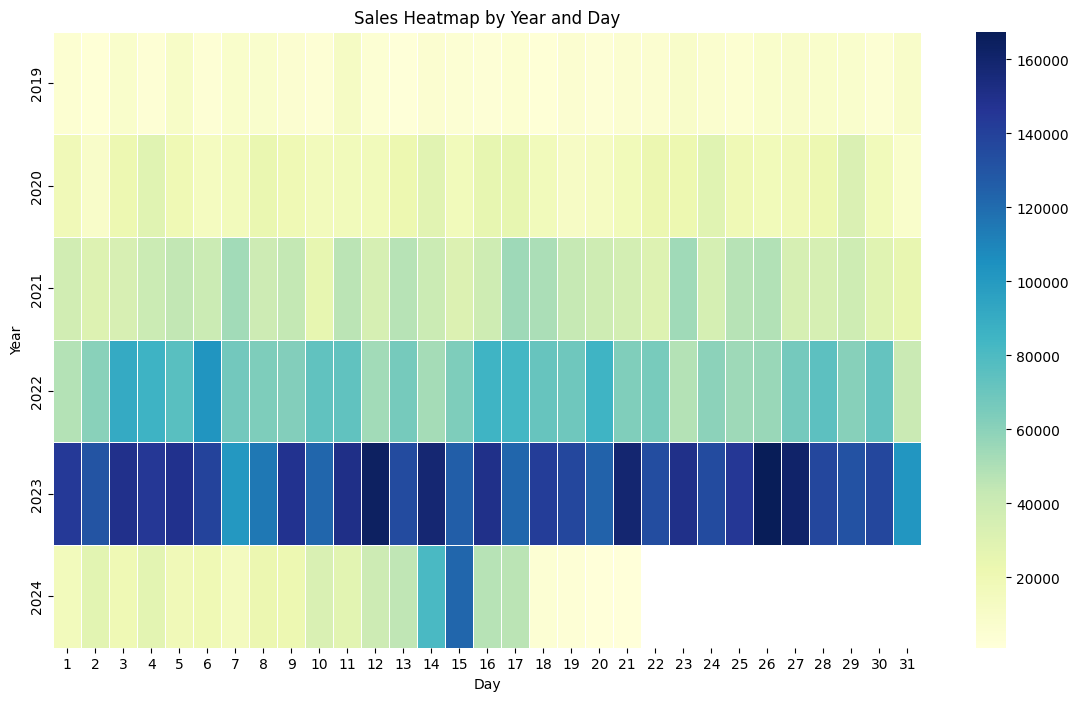

In [212]:
# 년도,일자별 -> profit으로 봐도 의미 없음.
pivot_table  = Product_Women_df.groupby(['created_year', 'created_day'])['sale_price'].sum().reset_index().pivot(index='created_year', columns='created_day', values='sale_price')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Year and Day')
plt.xlabel('Day')
plt.ylabel('Year')
plt.show()

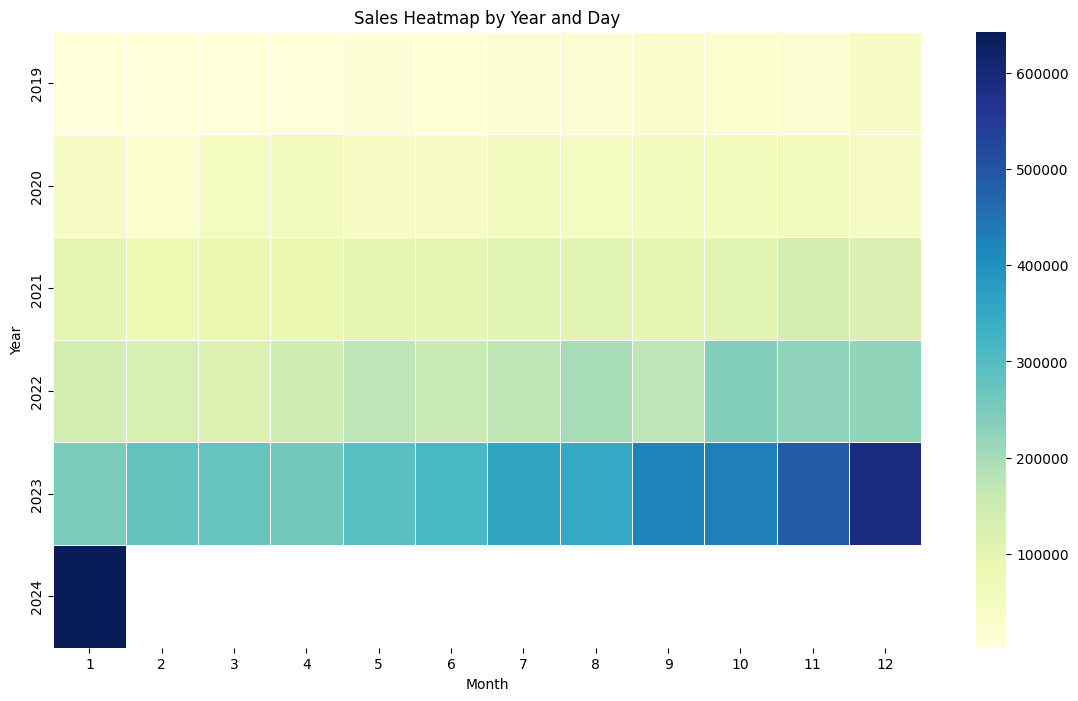

In [214]:
# 년도,월 별 판매액 
pivot_table  = Product_Women_df.groupby(['created_year', 'created_month'])['sale_price'].sum().reset_index().pivot(index='created_year', columns='created_month', values='sale_price')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Year and Day')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

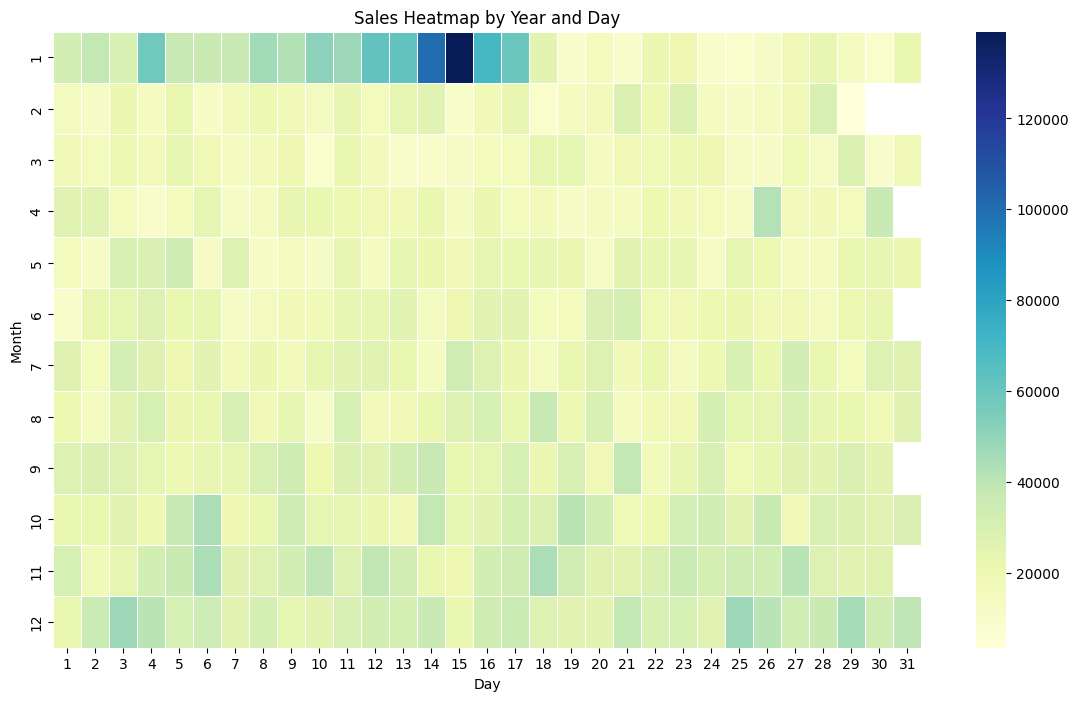

In [213]:
# 월,일자별 판매액 -> profit으로 봐도 변화 없음
pivot_table  = Product_Women_df.groupby(['created_month', 'created_day'])['sale_price'].sum().reset_index().pivot(index='created_month', columns='created_day', values='sale_price')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Sales Heatmap by Year and Day')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()

 ## 줸장 실패
 - 년도, 월별, 일별로는 특별한 패턴을 발견하기 어려움.
 - 남성복 여성복의 차이도 없음.

In [167]:
# 성별에 따른 월별 매출 판매액 비교
# 겨울철에 많은 판매가 있었지만, 이는 월이 지날수록 사람이 많이 유입되는 것에 따른 당연한 이치 
monthly_sales= Complete_event_user_orderItem.groupby(['department','created_month'])['sale_price'].sum()
monthly_sales.groupby('department').nlargest(5)

department  department  created_month
Men         Men         1                1.380538e+06
                        12               1.235183e+06
                        10               1.076398e+06
                        11               1.047652e+06
                        8                8.355661e+05
Women       Women       1                1.171860e+06
                        12               1.019848e+06
                        11               9.386288e+05
                        10               8.585405e+05
                        9                7.906385e+05
Name: sale_price, dtype: float64

## 고객당 방문 횟수

In [257]:
#  고객당 방문 횟수.
# 80044명 중 5번 이상 온 사람이 4045  =  5%정도 => 4년동안의 데이터인데 5번 이상이 고작 5프로?
purchase_frequency = events_user_order_item[events_user_order_item['event_type'] == 'purchase'].groupby('user_id').size().reset_index(name='purchase_count')
purchase_frequency[purchase_frequency['purchase_count'] > 5]

,user_id,purchase_count
8,9.0,6
10,12.0,6
14,17.0,7
35,43.0,9
50,60.0,7
...,...,...
79935,99868.0,6
79960,99896.0,9
79968,99905.0,9
79980,99920.0,7


In [255]:
visit_more_5_idx = purchase_frequency[purchase_frequency['purchase_count'] > 5].reset_index(drop=True).set_index('user_id').index

In [311]:
visit_more_5_user = events_user_order_item[events_user_order_item['user_id'].isin(visit_more_5_idx)]
visit_less_5_user = events_user_order_item[~events_user_order_item['user_id'].isin(visit_more_5_idx)]

In [269]:
# 5번 이상 방문한 사람들은 3722의 평균 매출을 기록함. 
visit_more_5_user.groupby('user_id')['sale_price'].sum().mean().round()

3722.0

In [270]:
# 전체 고객들의 평균 매출액과 비교하면 꽤나 큰 차이가 보임. 
events_user_order_item.groupby('user_id')['sale_price'].sum().mean().round()

972.0

In [314]:
# 방문자들의 유입 경로의 차이 = 없다. 
print(visit_more_5_user['traffic_source'].value_counts(normalize=True))
print('-----------------')
print(visit_less_5_user['traffic_source'].value_counts(normalize=True))

Email       0.446645
Adwords     0.300062
Facebook    0.101528
YouTube     0.101290
Organic     0.050475
Name: traffic_source, dtype: float64
-----------------
Email       0.449628
Adwords     0.300449
Facebook    0.100708
YouTube     0.099127
Organic     0.050089
Name: traffic_source, dtype: float64


In [318]:
# 지역에 따른 차이도 크게 없음. 
# 중국 사람들이 많이 방문하더라. 
print(visit_more_5_user['state'].value_counts(normalize=True).nlargest(7))
print('-----------------')
print(visit_less_5_user['state'].value_counts(normalize=True).nlargest(7))

Guangdong     0.052213
England       0.044133
California    0.035373
Texas         0.024551
Zhejiang      0.023917
Hebei         0.023513
Shanghai      0.023462
Name: state, dtype: float64
-----------------
Guangdong     0.054014
England       0.040430
California    0.036777
Shanghai      0.024575
Texas         0.024015
Zhejiang      0.022363
Beijing       0.021929
Name: state, dtype: float64


## 다른 시선 : 연도별 (23년에는 도대체 무슨일이!?!??!)

23년에만 폭발적으로 증가했느데 특별한 이유가 있는가?

1. traffic_source의 차이가 존재할 것이다
 - 비율의 차이가 없는 것을 보아 유입 경로가 영향을 주지 않음. 광고가 더 많이 발생했다던가 그런 일은 없었다.

In [288]:
events_user_order_item[events_user_order_item['created_year']== 2023]['traffic_source'].value_counts(normalize=True)

Email       0.448098
Adwords     0.298255
YouTube     0.101821
Facebook    0.101205
Organic     0.050620
Name: traffic_source, dtype: float64

In [303]:
events_user_order_item[events_user_order_item['created_year']!= 2023]['traffic_source'].value_counts(normalize=True)

Email       0.449893
Adwords     0.302247
Facebook    0.100568
YouTube     0.097532
Organic     0.049759
Name: traffic_source, dtype: float64

2. 23년에 특정 State에서 많은 유입이 일어났을것이다.
 - 그러지 않았다.

In [302]:
events_user_order_item[events_user_order_item['created_year']!= 2023].groupby('state')['sale_price'].count().sort_values(ascending=False).nlargest(10)

state
Guangdong     37029
England       29329
California    26928
Texas         16380
Shanghai      15842
Zhejiang      15687
Beijing       15665
Hebei         14631
São Paulo     14432
Jiangsu       13015
Name: sale_price, dtype: int64

In [299]:
events_user_order_item[events_user_order_item['created_year']== 2023].groupby('state')['sale_price'].count().sort_values(ascending=False).nlargest(10)

state
Guangdong     33086
England       24429
California    20767
Shanghai      15984
Texas         15131
Zhejiang      13923
Hebei         13550
Beijing       13204
São Paulo     12367
Jiangsu       11760
Name: sale_price, dtype: int64

3. 특정 카테고리의 제품이 많이 팔렸을 것이다.
 -  아닌데요?

In [305]:
events_user_order_item[events_user_order_item['created_year']!= 2023].groupby('category')['sale_price'].count().sort_values(ascending=False).nlargest(10)

category
Intimates                        50738
Jeans                            48420
Tops & Tees                      46087
Fashion Hoodies & Sweatshirts    45019
Swim                             43932
Sweaters                         43448
Sleep & Lounge                   42554
Shorts                           42345
Accessories                      37458
Active                           34263
Name: sale_price, dtype: int64

In [306]:
events_user_order_item[events_user_order_item['created_year']== 2023].groupby('category')['sale_price'].count().sort_values(ascending=False).nlargest(10)

category
Intimates                        45913
Jeans                            42887
Tops & Tees                      40130
Fashion Hoodies & Sweatshirts    40057
Swim                             38340
Sweaters                         37798
Shorts                           36985
Sleep & Lounge                   36740
Accessories                      32810
Outerwear & Coats                31041
Name: sale_price, dtype: int64

4. 이벤트 타입에서 purchase가 유독 많이 올라서 매출이 증가했을것이다.
 - ㄴㄴ 그냥 사람이 많음
 

In [324]:
events_user_order_item[events_user_order_item['created_year']== 2023]['event_type'].value_counts(normalize=True)

department    0.264477
product       0.264476
cart          0.264476
purchase      0.139049
home          0.067522
Name: event_type, dtype: float64

In [325]:
events_user_order_item[events_user_order_item['created_year']!= 2023]['event_type'].value_counts(normalize=True)

product       0.264664
cart          0.264664
department    0.264662
purchase      0.139213
home          0.066797
Name: event_type, dtype: float64

##  End